In [ ]:
# for reference = DONT RUN
t_hist_slice = t_hist.sel(time=slice('1950-01-01', '2000-12-31'), lat=slice(10,60), lon=slice(260,360))
t_hist_2p5m = t_hist_slice.sel(lev=2.5)
t_hist_2500m = t_hist_slice.sel(lev=2500)
t_fut_slice = t_fut.sel(time=slice('2050-01-01', '2100-12-31'), lat=slice(10,60), lon=slice(260,360))
t_fut_2p5m = t_fut_slice.sel(lev=2.5)
t_fut_2500m = t_fut_slice.sel(lev=2500)

In [3]:
# RUN THIS [1]
# Start by importing our modules
import xarray as xr
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# RUN THIS [2]
# Load the historical model output dataset
ds_hist = xr.open_mfdataset('../shared-datasets/thetao_hist/*.nc')

# load the future model output data set
ds_fut = xr.open_mfdataset('../shared-datasets/thetao_fut/*.nc')

t_hist = ds_hist.thetao
t_fut = ds_fut.thetao

t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao
t_hist_2500m = xr.open_dataset('t_hist_2500m.nc').thetao

t_fut_2p5m = xr.open_dataset('t_fut_2p5m.nc').thetao
t_fut_2500m = xr.open_dataset('t_fut_2500m.nc').thetao

__________________________________________________________________________________________________________________________________________________________________________________________________________

## Task 3
Produce 2-dimensional (latitude-longitude) maps showing the differences in time-mean temperature between the historical and future period, for 
- (1) northern hemisphere summer months (June, July & August)
- (2) northern hemisphere winter months (December, January, February). Identify in your written descriptions the regions and seasons with the largest differences. 

__________________________________________________________________________________________________________________________________________________________________________________________________________

**(1) northern hemisphere summer months (June, July & August)**

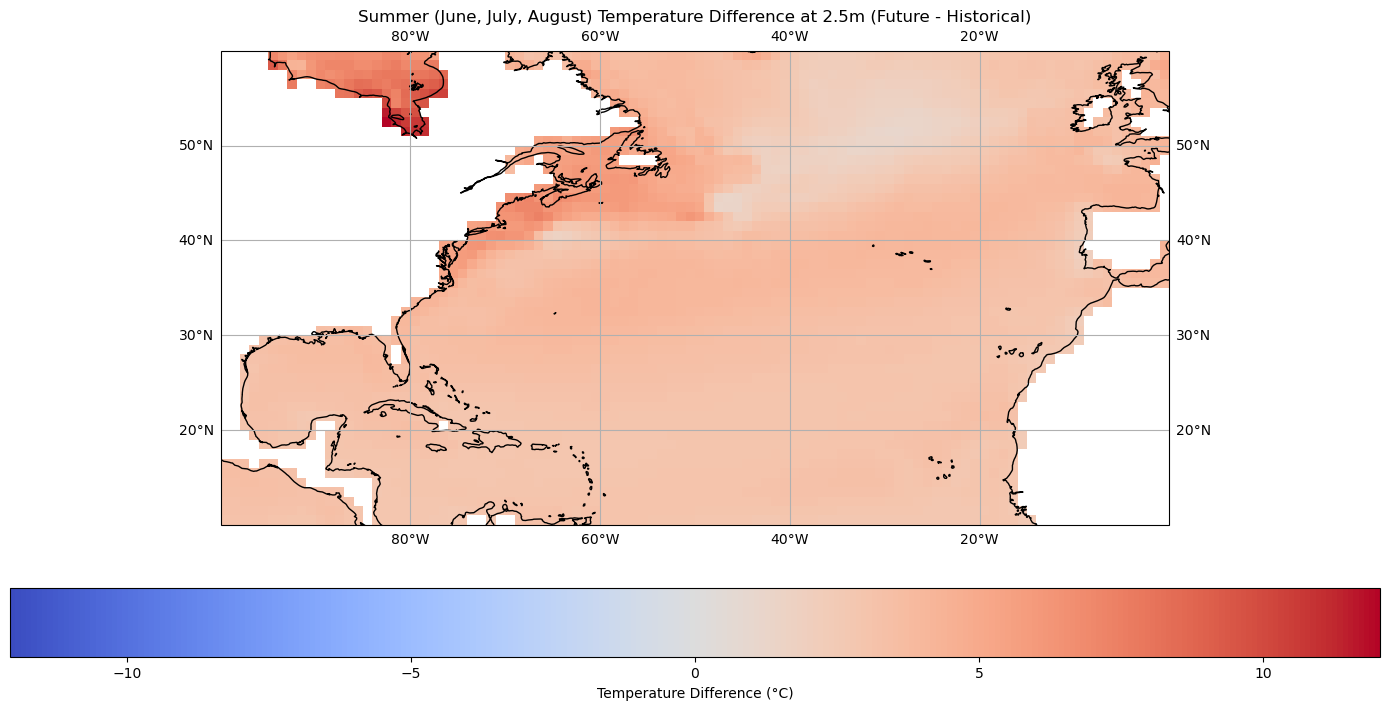

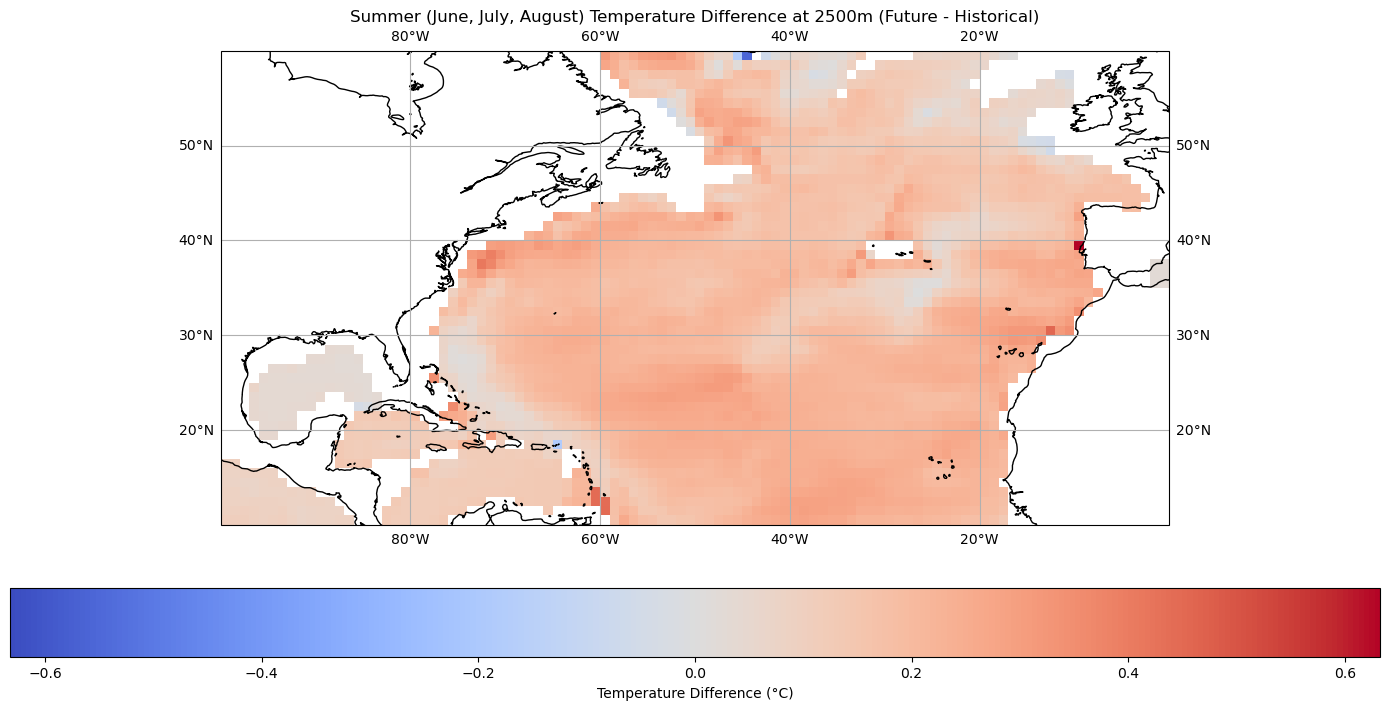

In [28]:
# Define the summer months
summer_months = [6, 7, 8]

# Define a function to calculate seasonal means
def seasonal_mean(data, months):
    return data.sel(time=data['time.month'].isin(months)).mean(dim='time')

# Load datasets
t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao
t_fut_2p5m = xr.open_dataset('t_fut_2p5m.nc').thetao

# Calculate summer means at 2.5m
t_hist_summer_2p5m = seasonal_mean(t_hist_2p5m, summer_months)
t_fut_summer_2p5m = seasonal_mean(t_fut_2p5m, summer_months)

# Compute summer differences
summer_diff_2p5m = t_fut_summer_2p5m - t_hist_summer_2p5m

# Plot summer differences at 2.5m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
summer_diff_2p5m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(summer_diff_2p5m)), vmax=np.max(np.abs(summer_diff_2p5m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Summer (June, July, August) Temperature Difference at 2.5m (Future - Historical)')
plt.tight_layout()
plt.show()

# Calculate summer means at 2500m
t_hist_summer_2500m = seasonal_mean(t_hist_2500m, summer_months)
t_fut_summer_2500m = seasonal_mean(t_fut_2500m, summer_months)

# Compute summer differences
summer_diff_2500m = t_fut_summer_2500m - t_hist_summer_2500m

# Plot summer differences at 2500m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
summer_diff_2500m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(summer_diff_2500m)), vmax=np.max(np.abs(summer_diff_2500m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Summer (June, July, August) Temperature Difference at 2500m (Future - Historical)')
plt.tight_layout()
plt.show()


Mean Temperature Difference (Future - Historical) at 2.5,m and 2500m. Mean temperature difference at 2.5 meters (Top) in the North Atlantic Ocean between 2050-2100 and 1950-2000 ranges from -10°C to +10°C, with blue for cooler areas and red for warmer regions. Mean temperature difference at 2500 meters (Bottom) in the North Atlantic Ocean between 2050-2100 and 1950-2000 ranges from -0.6°C to +0.6°C, with blue for cooler areas and red for warmer regions.

__________________________________________________________________________________________________________________________________________________________________________________________________________

**(2) northern hemisphere winter months (December, January, February)**

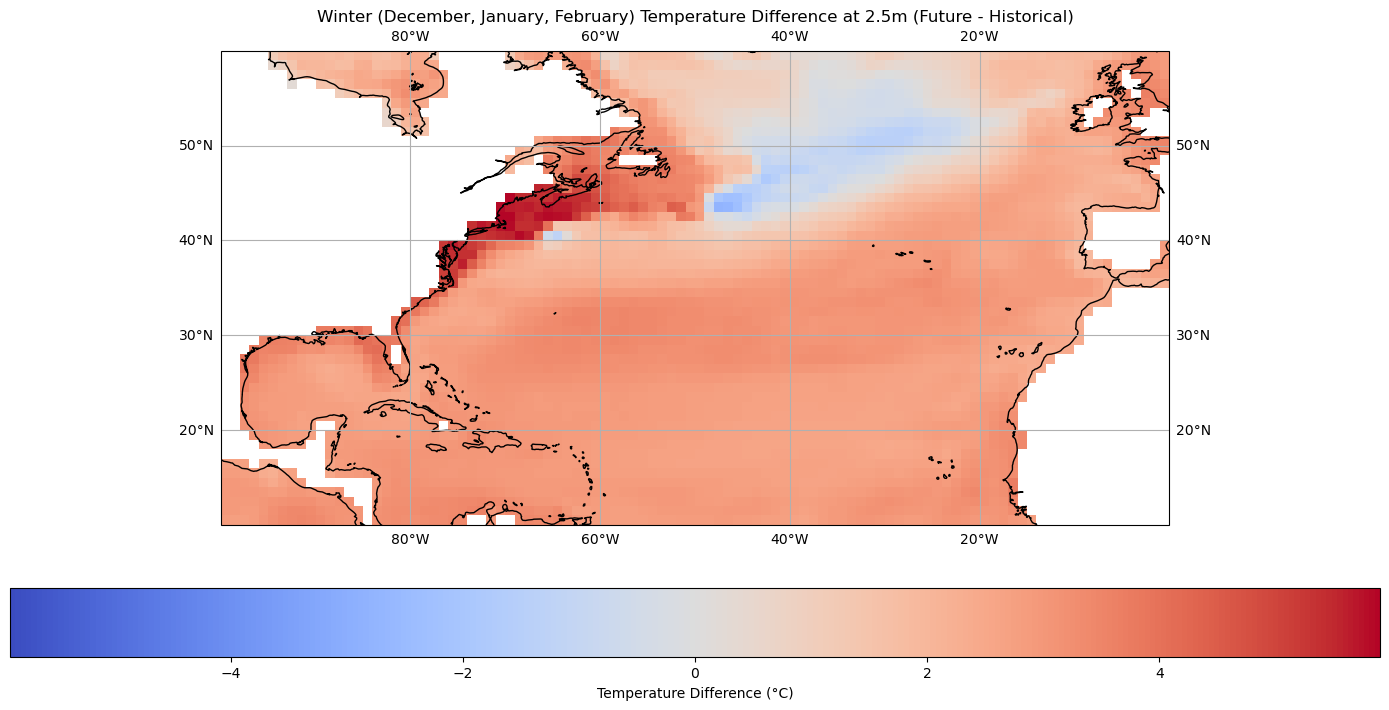

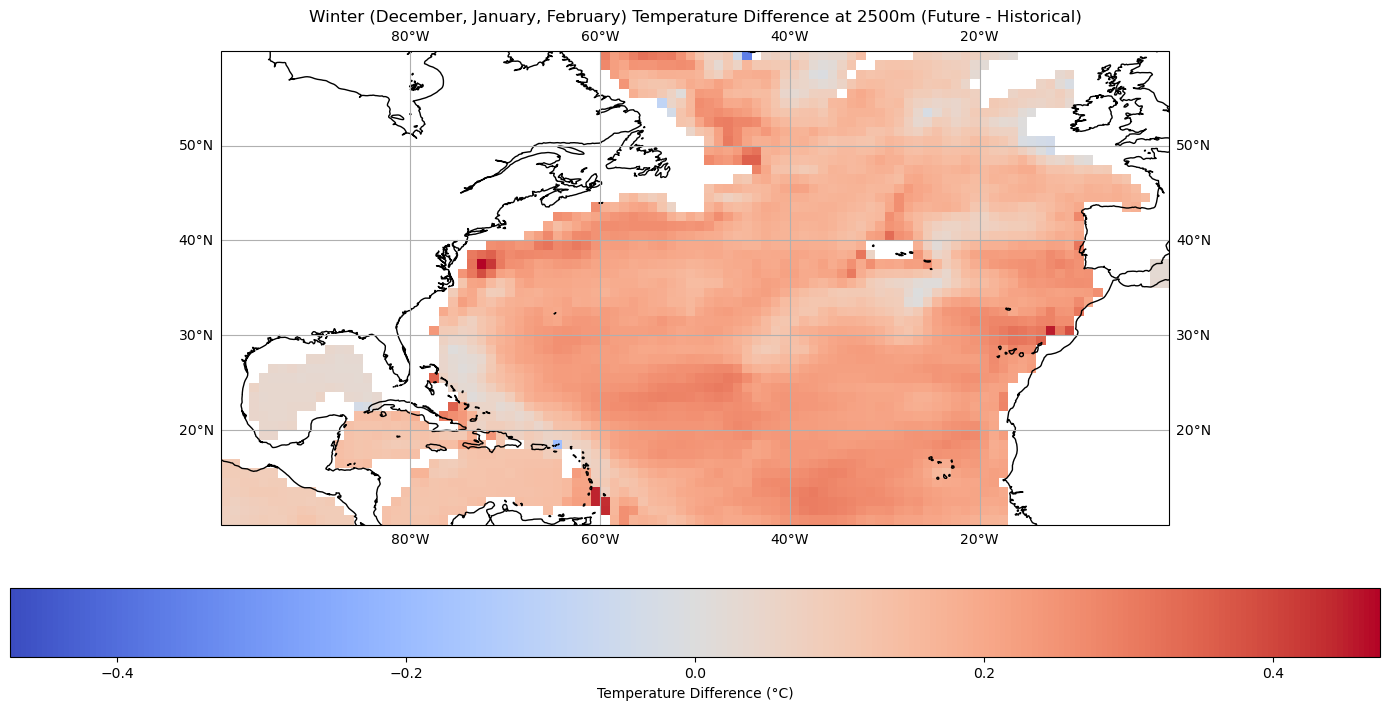

In [31]:
# Define the winter months
winter_months = [12, 1, 2]

# Define a function to calculate seasonal means
def seasonal_mean(data, months):
    return data.sel(time=data['time.month'].isin(months)).mean(dim='time')

# Calculate winter means at 2.5m
t_hist_winter_2p5m = seasonal_mean(t_hist_2p5m, winter_months)
t_fut_winter_2p5m = seasonal_mean(t_fut_2p5m, winter_months)

# Compute winter differences
winter_diff_2p5m = t_fut_winter_2p5m - t_hist_winter_2p5m

# Plot winter differences at 2.5m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
winter_diff_2p5m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(winter_diff_2p5m)), vmax=np.max(np.abs(winter_diff_2p5m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Winter (December, January, February) Temperature Difference at 2.5m (Future - Historical)')
plt.tight_layout()
plt.show()

# Calculate winter means at 2500m
t_hist_winter_2500m = seasonal_mean(t_hist_2500m, winter_months)
t_fut_winter_2500m = seasonal_mean(t_fut_2500m, winter_months)

# Compute winter differences
winter_diff_2500m = t_fut_winter_2500m - t_hist_winter_2500m

# Plot winter differences at 2500m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
winter_diff_2500m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(winter_diff_2500m)), vmax=np.max(np.abs(winter_diff_2500m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Winter (December, January, February) Temperature Difference at 2500m (Future - Historical)')
plt.tight_layout()
plt.show()


__________________________________________________________________________________________________________________________________________________________________________________________________________

Identify in your written descriptions the regions and seasons with the largest differences.

The analysis of temperature variations across different seasons reveals substantial warming in higher latitudes, particularly in the Arctic and subarctic regions. This trend is more pronounced during winter months due to ice-albedo feedback mechanisms that amplify the warming effect. The ice-albedo feedback occurs when melting ice exposes darker surfaces, such as ocean water or land, which absorb more solar radiation and further enhance warming. Consequently, these regions exhibit significant temperature increases, highlighting the vulnerability of polar areas to climate change.

In the summer months, the largest temperature differences between the future and historical periods are observed in higher latitudes, including Northern Canada, Northern Europe, and Siberia. These areas show significant warming due to reduced snow and ice cover, which leads to positive feedback effects. Additionally, inland continental regions, far from the moderating influence of the ocean, experience more pronounced warming. The absence of the maritime influence results in larger temperature increases in these areas, which can have significant implications for local ecosystems and weather patterns.

During the winter months, the largest temperature differences occur in higher latitudes, such as the Arctic, Northern Canada, and Northern Europe. These regions exhibit substantial warming, particularly in the Arctic, where ice-albedo feedback mechanisms further enhance warming. Moreover, Northern Hemisphere coastal regions show significant changes due to the influence of ocean currents and changes in atmospheric circulation patterns. These coastal areas are particularly sensitive to climate change, and the observed temperature increases can impact marine life, coastal communities, and weather systems.


__________________________________________________________________________________________________________________________________________________________________________________________________________